In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import powerlaw

# 1
Draw a histogram with marked sigma intervals for random variables rom the normal distribution.

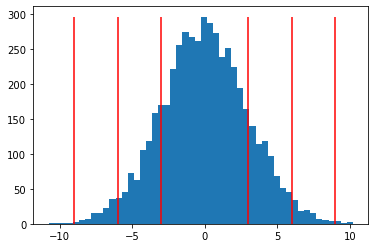

In [2]:
N=5000
sigma =3
obs = np.random.normal(scale=sigma, size=N)
bins = plt.hist(obs, bins=N//100)
plt.vlines([k*sigma for k in range(-3,4) if k!=0], 0, max(bins[0]), color='r')


## 2
Check the Pareto rule for variables from the geometric distribution

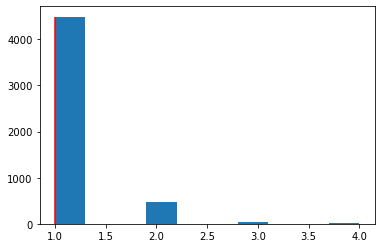

In [3]:
obs = np.random.geometric(p=0.9, size=N)
max_ = np.max(obs)
q08 = np.quantile(obs, 0.8)
bins = plt.hist(obs)
plt.vlines([q08], 0, max(bins[0]), color='red')

By checking th quantiles we can observe that 80% percent of the data covers ~20% of the possible values

In [4]:
print(f'All observations are contained in the [0, {max_}] interval')
print(f'80% percent of the data is contained in the [0, {q08}] interval, which covers {np.round(100 * q08/max_)}% of the interval') 

All observations are contained in the [0, 4] interval
80% percent of the data is contained in the [0, 1.0] interval, which covers 25.0% of the interval



# 3
Drawing a power distribution histogram and marking 0.2, 0.4, 0.6, 0.8 and 1.0 quantiles

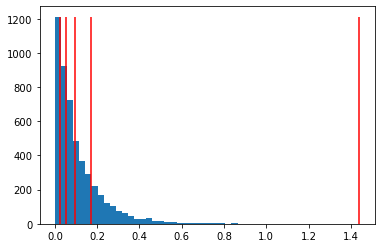

In [5]:
obs = np.random.pareto(10, size=N)
quantiles = [np.quantile(obs, i/5) for i in range(1,6)]
bins = plt.hist(obs, bins=N//100)
plt.vlines(quantiles, 0, max(bins[0]), color='red')

We can see (1st line) that 20% of the data is contained in [0, 0.8] interval

In [6]:
max_ = np.max(obs)
q08 = np.quantile(obs, 0.8)
print(f'All observations are contained in the [0, {max_}] interval')
print(f'80% percent of the data is contained in the [0, {q08}] interval, which covers {np.round(100 * q08/max_)}% of the interval')

All observations are contained in the [0, 1.4396544922316203] interval
80% percent of the data is contained in the [0, 0.17236967224976538] interval, which covers 12.0% of the interval


## 4

Histogram for observations drawn from zeta distrubtion

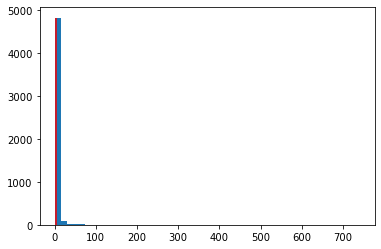

In [7]:
obs = np.random.zipf(a=2, size=N)
max_ = np.max(obs)
q08 = np.quantile(obs, 0.8)
bins = plt.hist(obs, bins=N//100)
plt.vlines([q08], 0, max(bins[0]), color='red')

In [8]:
print(f'All observations are contained in the [0, {max_}] interval')
print(f'80% percent of the data is contained in the [0, {q08}] interval, which covers {np.round(100 * q08/max_, 5)}% of the interval') 

All observations are contained in the [0, 739] interval
80% percent of the data is contained in the [0, 3.0] interval, which covers 0.40595% of the interval


## 5

In [9]:
import networkx as nx

Barabasi - albert network is generated as follows: Everytime we pick a new node, we connect it with $m$ existing nodes. Repeat $n$ times 

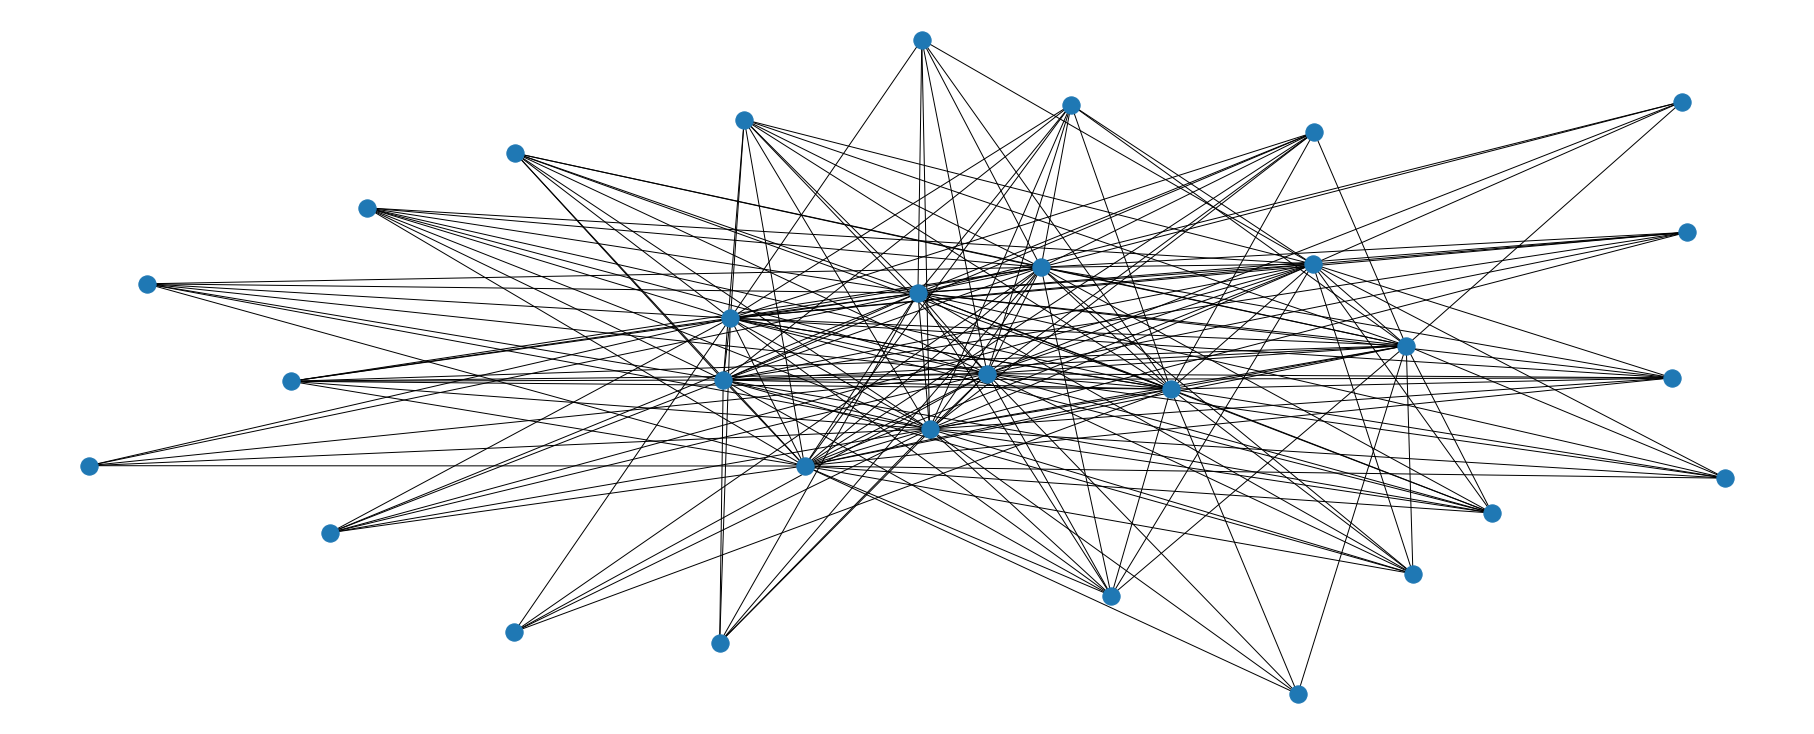

In [10]:
ba = nx.generators.random_graphs.barabasi_albert_graph(30, 20)
plt.figure(figsize=(25,10))
nx.draw_kamada_kawai(ba)

Erdos renyi graph is generated as follows: Pick $N$ nodes, and for each pair of nodes, the probability that they should be connected is equal to $p$.

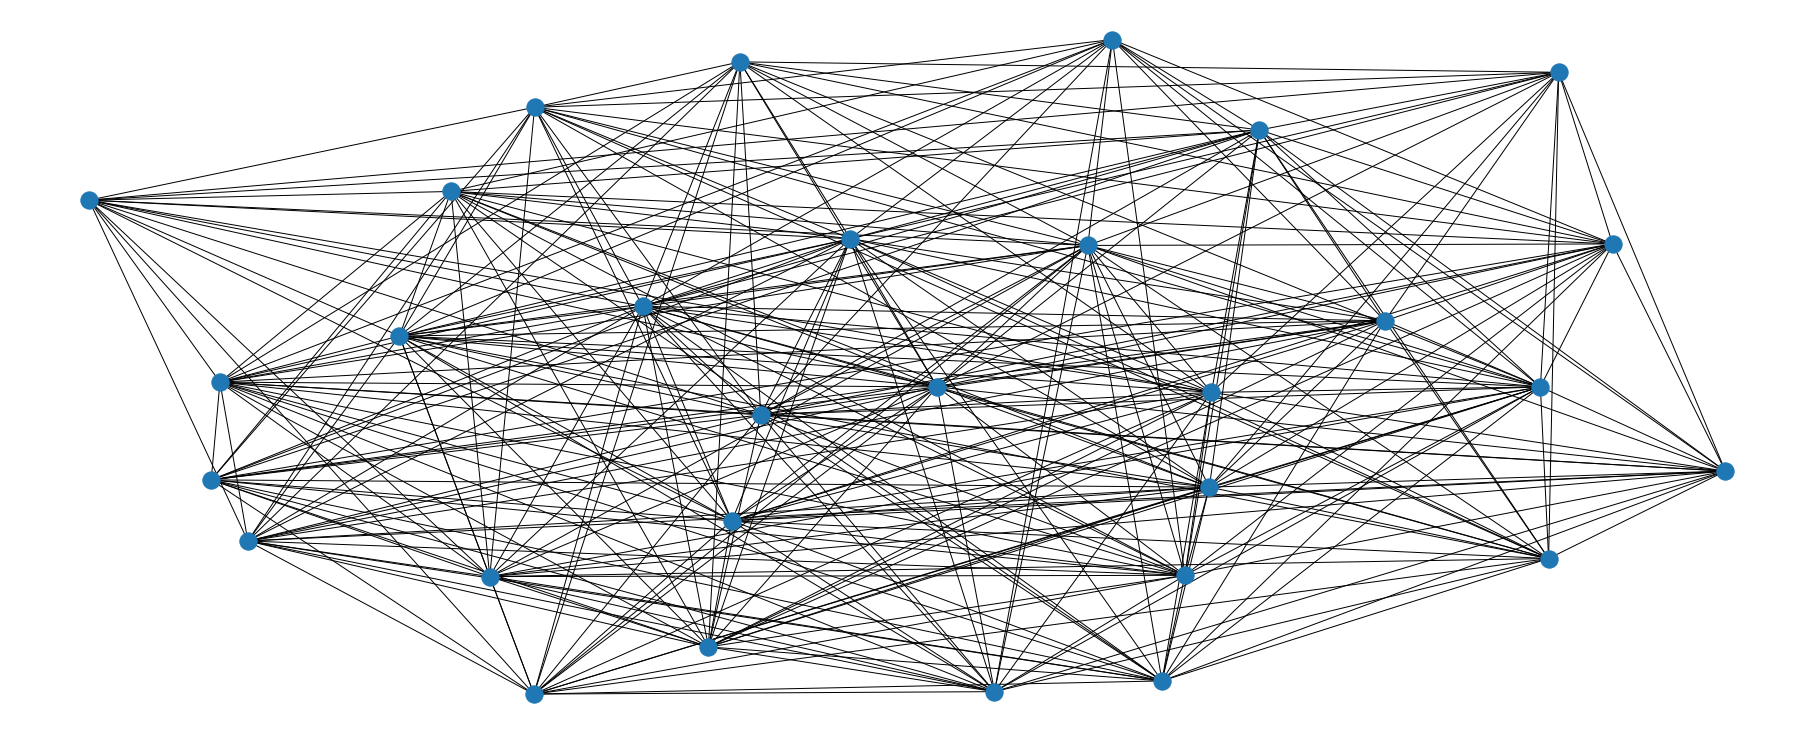

In [11]:
er = nx.generators.random_graphs.erdos_renyi_graph(30, 0.7)
plt.figure(figsize=(25,10))
nx.draw_kamada_kawai(er)

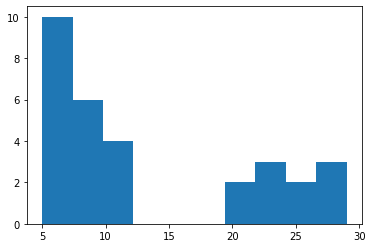

In [12]:
def draw_degree_hist(G: nx.Graph) -> None:
    degrees = dict(G.degree).values()
    plt.hist(degrees)
draw_degree_hist(ba)

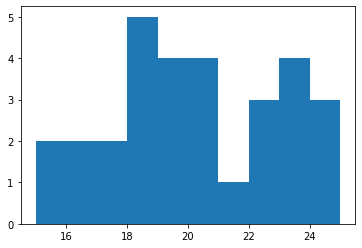

In [13]:
draw_degree_hist(er)

Computing mean and variance estimators

In [14]:
def get_mean(G: nx.Graph) -> float:
    degrees = [v for k, v in G.degree]
    return np.mean(degrees)
def get_variance(G: nx.Graph) -> float:
    degrees = [v for k, v in G.degree]
    return np.var(degrees)

print(f'Barabasi albert: Mean: {get_mean(ba)}, variance: {get_variance(ba)}')
print(f'Erdos Renyi: Mean: {get_mean(er)}, variance: {get_variance(er)}')

Barabasi albert: Mean: 13.333333333333334, variance: 67.28888888888888
Erdos Renyi: Mean: 19.8, variance: 7.626666666666667


# 6.1

In [15]:
G = nx.generators.random_graphs.barabasi_albert_graph(15, 5)

Uses eigenvectors and spectral matrix decomopsition

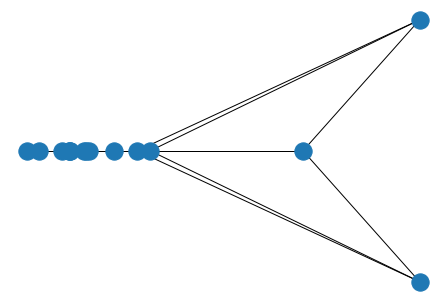

In [16]:
nx.draw_spectral(G)

Places nodes in a circle

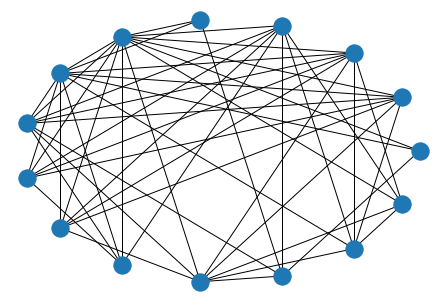

In [17]:
nx.draw_circular(G)

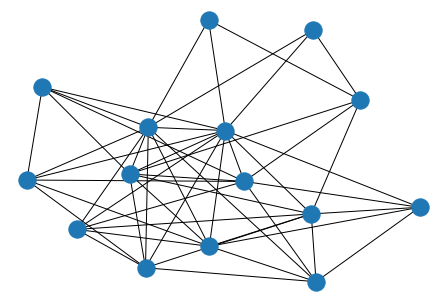

In [18]:
nx.draw_kamada_kawai(G)

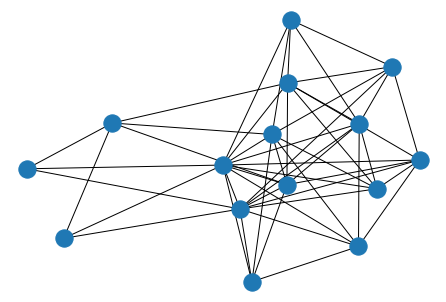

In [19]:
nx.draw_spring(G)

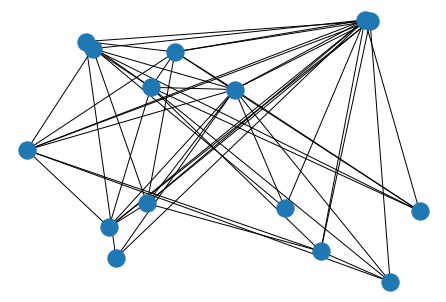

In [20]:
nx.draw_random(G)

## 6.3

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


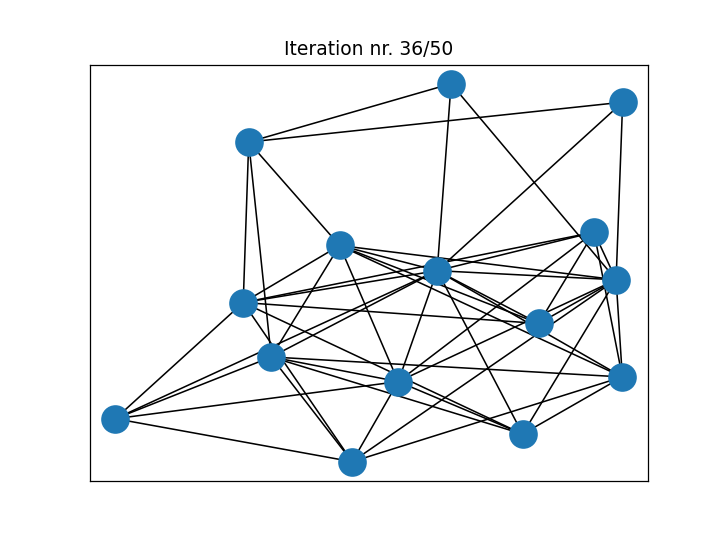

In [22]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
nx.draw_networkx(G, nx.spring_layout(G, iterations=1, seed=42), with_labels=False)

def init():
    nx.draw_networkx(G, nx.spring_layout(G, iterations=1, seed=42), with_labels=False, ax=ax)
    return ax
    

def update(frame):
    ax.clear()
    nx.draw_networkx(G, nx.spring_layout(G, iterations=round(frame), seed=42), with_labels=False, ax=ax)
    ax.set_title(f"Iteration nr. {round(frame)}/50")
    return ax

ani = FuncAnimation(fig, update, frames=np.linspace(0, 50), interval=100, init_func=init)